In [3]:
# Grant access to google drive.
# Run this cell, then you’ll see a link, click on that link, allow access
# Copy the code that pops up, paste it in the box, hit Enter

from google.colab import drive
drive.mount('/content/gdrive')

# Change working directory to be current folder
# os.chdir('/content/gdrive/My Drive/Your Folder Name/Your sub Folder Name')
os.chdir('/content/gdrive/My Drive/BA5002_new')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 corplot.ipynb		        sentiment_analysis.ipynb
 data_corr.png		        sentiment_analysis.xlsx
 EDA.ipynb		        sentimentBuild.xlsx
 LDA.ipynb		        sentimentpositive.png
 PositiveReview.xlsx	        StrongPostive.xlsx
'RandomForest&Logistic.ipynb'   test.xlsx
 RandomForestNew.ipynb	        train.xlsx
 reviews_new.csv	        wordcloud.ipynb
 reviews_new.xlsx	        数据1014.xlsx
'RF-无days of comments.ipynb'   新增数据.xlsx
 sentiment_analysis.csv


In [4]:
# import libraries
import csv
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import nltk
from nltk import FreqDist, SnowballStemmer
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# data
df= pd.read_excel('PositiveReview.xlsx')
df.head()
df=pd.DataFrame(df)
df.head(3)

,content,Analysis
0,Good game tanks 馃榿,Positive
1,It's good ._.馃憤,Positive
2,So good 馃憤馃槉,Positive


In [19]:
## preprocessing

stop = stopwords.words('english')+['game','however','play','would','could','takes','ive','need','almost','though','ever','every','many','see','give','played','please','getting','dont','theres','want','overall','genshin','players','playing','gameplay','phone','im','still','much','lot','since','really','games','even','get','cant','one','make','also']
snowball = SnowballStemmer('english')


# 对每行的函数;tt是字符串，考虑用函数先删除字符串tt中的标点符号
def myPrep(tt):
    tt  = tt.translate(str.maketrans('', '', string.punctuation))
    toks = nltk.word_tokenize(tt.lower())
    toks = [ t for t in toks if t not in string.punctuation+"’“”" ]
    toks = [ t for t in toks if t not in stop ]
    toks = [ t for t in toks if not t.isnumeric() ]
    # toks = [ snowball.stem(t) for t in toks ]
    return toks

In [20]:
# Preprocess each file
content_clean = [ myPrep(f) for f in df.content ]

# Flatten the list of lists for FreqDist; break the docs
content_flat = [ c for l in content_clean for c in l ]

fd_content = FreqDist(content_flat)

      good characters      great       like       love      story    amazing        fun   graphics        new       time  character     mobile    problem    storage      world       best     update  beautiful    content 
       371        300        256        244        233        194        177        171        162        159        146        141        131        113        113        103         96         96         89         86 


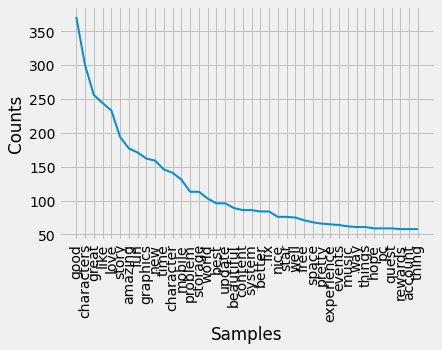

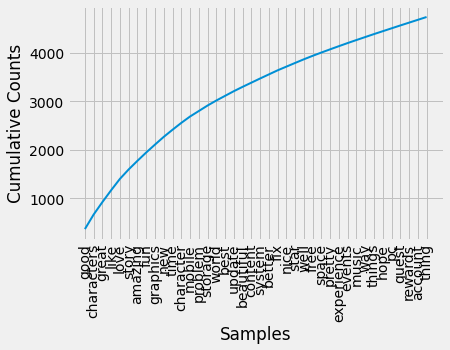

In [21]:
fd_content.tabulate(20)#输出top30

fd_content.plot(40) #高频词汇图
    
fd_content.plot(40,cumulative=True)#累积频数图

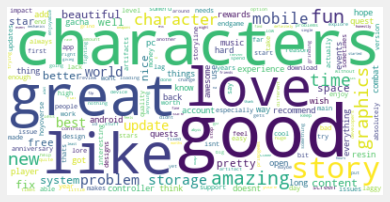

In [22]:
# Generate word clouds for the positive content
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_content = WordCloud(background_color="white").generate_from_frequencies(fd_content)
plt.imshow(wc_content, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
wc_content.to_file('sentimentpositive.png') 